In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('spam.csv', encoding='latin1')


In [4]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3348,ham,Oh is it! Which brand?,NaN,NaN,NaN
812,spam,Congratulations ur awarded either å£500 of CD ...,NaN,NaN,NaN
1713,spam,Hard LIVE 121 chat just 60p/min. Choose your g...,NaN,NaN,NaN
1105,ham,on hen night. Going with a swing,NaN,NaN,NaN
3729,ham,"I guess you could be as good an excuse as any,...",NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [8]:
df.sample(5)

,v1,v2
2069,spam,"Eerie Nokia tones 4u, rply TONE TITLE to 8007 ..."
3543,ham,Lol ok ill try to send. Be warned Sprint is de...
3694,ham,"Hello, As per request from &lt;#&gt; Rs.5 ha..."
3263,ham,I will send them to your email. Do you mind &...
4059,spam,This weeks SavaMob member offers are now acces...


In [9]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
4067,spam,TBS/PERSOLVO. been chasing us since Sept forå£...
2158,ham,I think you should go the honesty road. Call t...
4309,spam,Someone U know has asked our dating service 2 ...
3560,spam,Text BANNEDUK to 89555 to see! cost 150p texto...
1245,ham,Hello which the site to download songs its urg...


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [11]:
df['target'] = encoder.fit_transform(df['target'])

In [12]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
df.duplicated().sum()

403

In [15]:
df = df.drop_duplicates(keep='first')

In [16]:
df.duplicated().sum()

0

In [17]:
df.shape

(5169, 2)

In [18]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

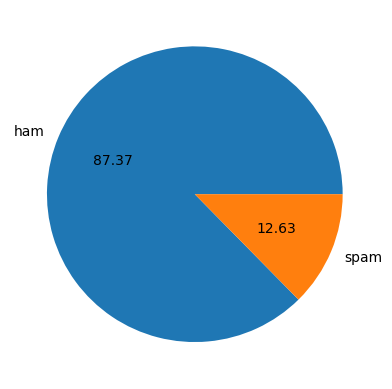

In [20]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [21]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
df['num_characters'] = df['text'].apply(len)

In [23]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [24]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [25]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [26]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [27]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [28]:
df[['num_characters', 'num_words', 'num_sentences']].describe()


,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [29]:
df[df['target'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()


,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [30]:
df[df['target'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()


,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [31]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

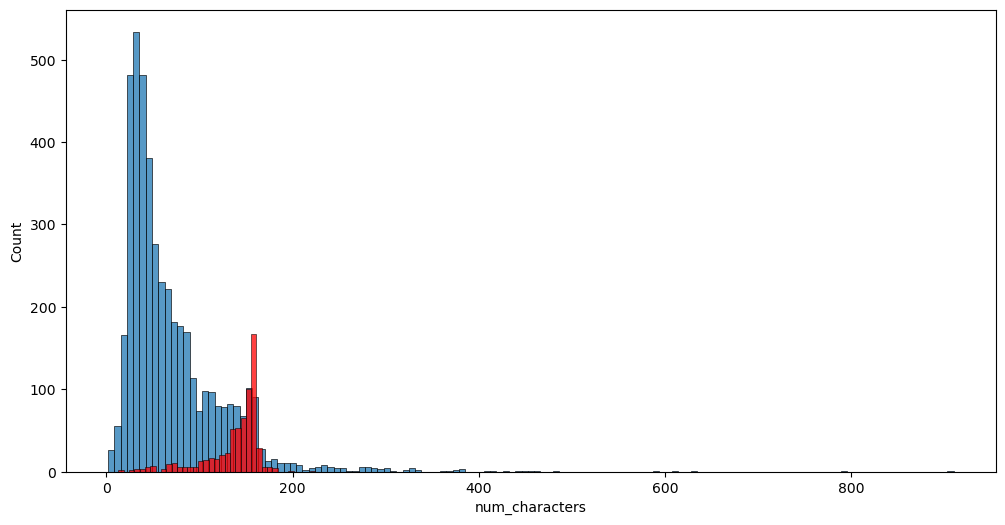

In [32]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

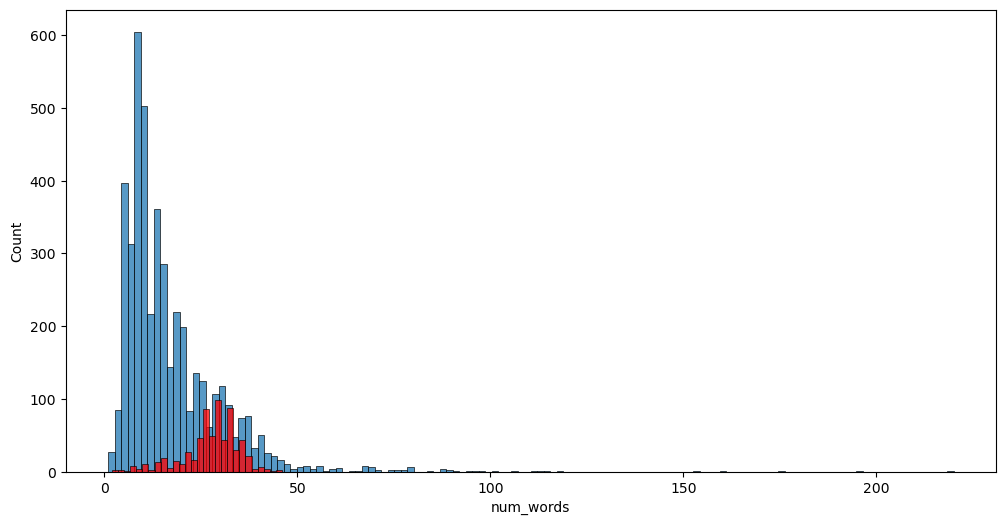

In [33]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


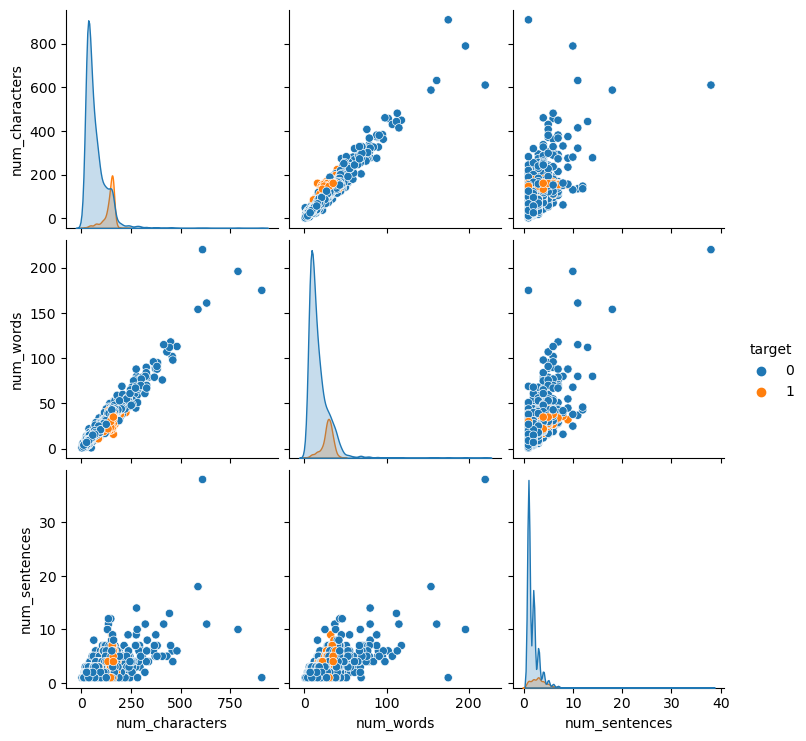

In [36]:
sns.pairplot(df,hue='target')

target             int32
text              object
num_characters     int64
num_words          int64
num_sentences      int64
dtype: object


<Axes: >

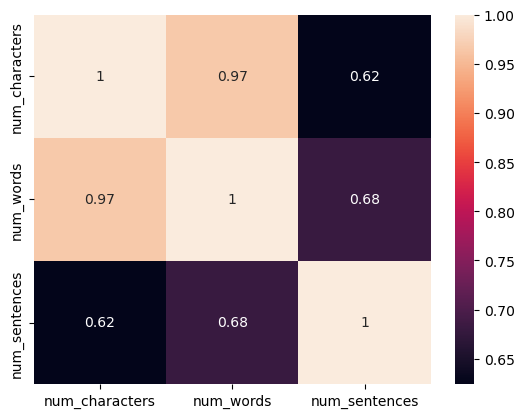

In [39]:
print(df.dtypes)
numeric_columns = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_columns.corr()
sns.heatmap(correlation_matrix, annot=True)


In [42]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

nltk.download('stopwords')
ps = PorterStemmer()

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)
transformed_text = transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")
print(transformed_text)

gon na home soon want talk stuff anymor tonight k cri enough today


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [43]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [45]:
from nltk.stem.porter import PorterStemmer
Ps = PorterStemmer()
Ps.stem('lovingg')

'lovingg'

In [46]:
df['transformed_text'] = df['text'].apply(transform_text)

In [47]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [51]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [52]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

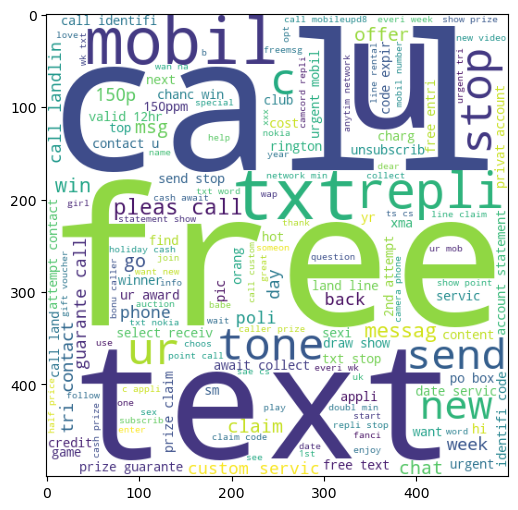

In [53]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [54]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

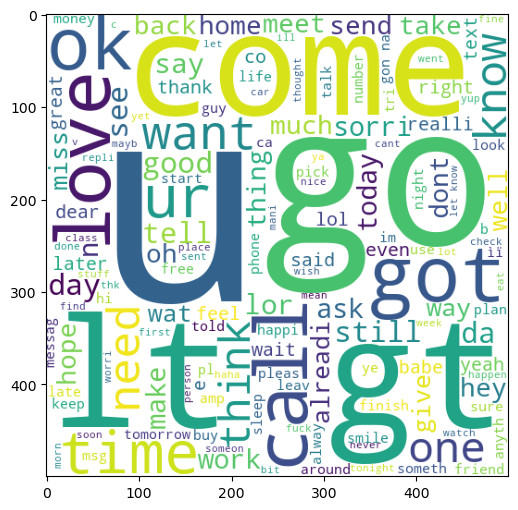

In [55]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [56]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [60]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)


In [61]:
len(spam_corpus)

9939

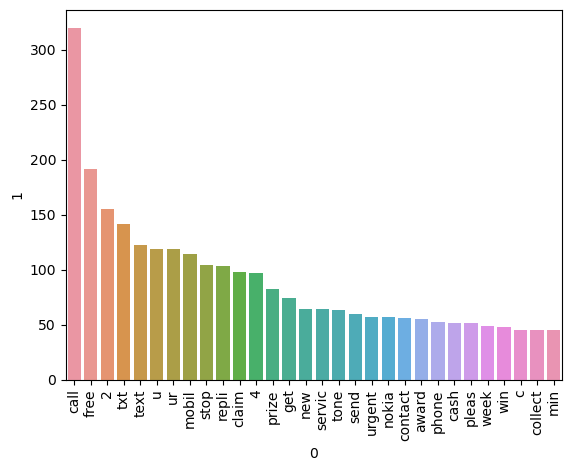

In [65]:
from collections import Counter
word_counts = Counter(spam_corpus)
common_words_df = pd.DataFrame(word_counts.most_common(30))
sns.barplot(x=common_words_df[0], y=common_words_df[1])
plt.xticks(rotation='vertical')
plt.show()


In [67]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [68]:
len(ham_corpus)

35404

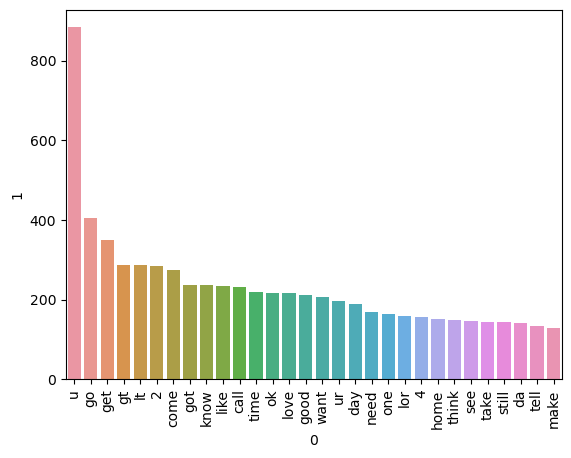

In [70]:
from collections import Counter
word_counts = Counter(ham_corpus)
common_words_df = pd.DataFrame(word_counts.most_common(30))
sns.barplot(x=common_words_df[0], y=common_words_df[1])
plt.xticks(rotation='vertical')
plt.show()


In [71]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [73]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [74]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [76]:
X.shape

(5169, 3000)

In [77]:
y = df['target'].values

In [78]:
from sklearn.model_selection import train_test_split

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [82]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [103]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [85]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [104]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [98]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [111]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [112]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB' : mnb,
    'DT' : dtc,
    'LR' : lrc,
    'Rf' : rfc,
    'AdaBoost' : abc,
    'BgC' : bc,
    'ETC' : etc,
    'GBDT' : gbdt,
    'xgb' : xgb
}

In [113]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    return accuracy,precision 

In [115]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [121]:
accurancy_scores = []
precision_scores = []
for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
    print("For ", name)
    print("Accuracy - ", current_accuracy)
    print("Precision - ",current_precision)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.97678916827853
Precision -  0.9548872180451128
For  KN
Accuracy -  0.9168278529980658
Precision -  1.0
For  NB
Accuracy -  0.9729206963249516
Precision -  0.9915966386554622
For  DT
Accuracy -  0.9332688588007737
Precision -  0.8275862068965517
For  LR
Accuracy -  0.9468085106382979
Precision -  0.8688524590163934
For  Rf
Accuracy -  0.971953578336557
Precision -  0.9754098360655737
For  AdaBoost
Accuracy -  0.9506769825918762
Precision -  0.8671875
For  BgC
Accuracy -  0.9622823984526112
Precision -  0.8840579710144928
For  ETC
Accuracy -  0.9777562862669246
Precision -  0.9841269841269841
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.96875
For  xgb
Accuracy -  0.9680851063829787
Precision -  0.9375


In [123]:
performance_df = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy': accuracy_scores, 'Precision': precision_scores}).sort_values('Precision', ascending=False)

In [124]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.916828,1.000000
2,NB,0.972921,0.991597
8,ETC,0.977756,0.984127
5,Rf,0.971954,0.975410
9,GBDT,0.946809,0.968750
0,SVC,0.976789,0.954887
10,xgb,0.968085,0.937500
7,BgC,0.962282,0.884058
4,LR,0.946809,0.868852
6,AdaBoost,0.950677,0.867188


In [126]:
performance_df1 = pd.melt(performance_df, id_vars="Algorithm")

In [127]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.916828
1,NB,Accuracy,0.972921
2,ETC,Accuracy,0.977756
3,Rf,Accuracy,0.971954
4,GBDT,Accuracy,0.946809
5,SVC,Accuracy,0.976789
6,xgb,Accuracy,0.968085
7,BgC,Accuracy,0.962282
8,LR,Accuracy,0.946809
9,AdaBoost,Accuracy,0.950677


C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


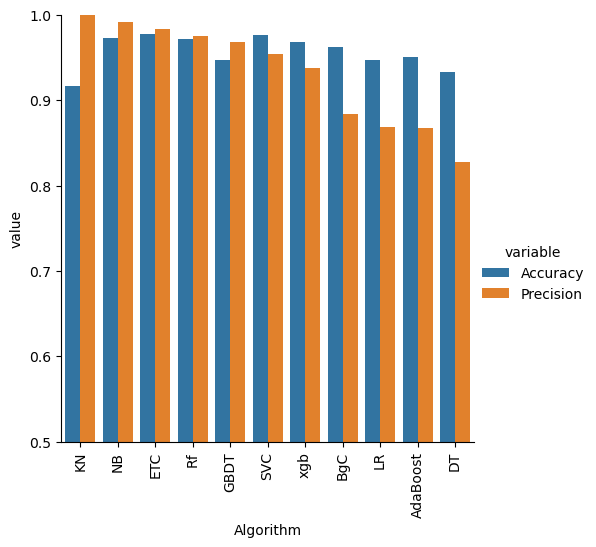

In [128]:
sns.catplot(x = 'Algorithm',y='value',hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [130]:
temp_df = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy_num_chars': accuracy_scores, 'Precision_max_ft_3000': precision_scores}).sort_values(by=['Precision_max_ft_3000'])

In [132]:
new_df = performance_df.merge(temp_df, on='Algorithm')

In [133]:
new_df_scaled = new_df.merge(temp_df, on='Algorithm')

In [134]:
temp_df = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy_num_chars': accuracy_scores, 'Precision_max_ft_3000': precision_scores}).sort_values(by=['Precision_max_ft_3000'])

In [135]:
new_df_scaled.merge(temp_df, on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_num_chars_x,Precision_max_ft_3000_x,Accuracy_num_chars_y,Precision_max_ft_3000_y,Accuracy_num_chars,Precision_max_ft_3000
0,KN,0.916828,1.000000,0.916828,1.000000,0.916828,1.000000,0.916828,1.000000
1,NB,0.972921,0.991597,0.972921,0.991597,0.972921,0.991597,0.972921,0.991597
2,ETC,0.977756,0.984127,0.977756,0.984127,0.977756,0.984127,0.977756,0.984127
3,Rf,0.971954,0.975410,0.971954,0.975410,0.971954,0.975410,0.971954,0.975410
4,GBDT,0.946809,0.968750,0.946809,0.968750,0.946809,0.968750,0.946809,0.968750
5,SVC,0.976789,0.954887,0.976789,0.954887,0.976789,0.954887,0.976789,0.954887
6,xgb,0.968085,0.937500,0.968085,0.937500,0.968085,0.937500,0.968085,0.937500
7,BgC,0.962282,0.884058,0.962282,0.884058,0.962282,0.884058,0.962282,0.884058
8,LR,0.946809,0.868852,0.946809,0.868852,0.946809,0.868852,0.946809,0.868852
9,AdaBoost,0.950677,0.867188,0.950677,0.867188,0.950677,0.867188,0.950677,0.867188


In [136]:
svc = SVC(kernel='sigmoid',gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
from sklearn.ensemble import VotingClassifier

In [138]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)], voting='soft')

In [139]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [140]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
precision 0.9921875


In [141]:
estimators=[('svm',svc),('nb',mnb),('et',etc)]
final_estimator=RandomForestClassifier()

In [143]:
from sklearn.ensemble import StackingClassifier

In [146]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [147]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.95


In [149]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))

In [157]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.naive_bayes import MultinomialNB
X_train = ["Sample text 1","Sample text 2","Sample text 3"]
y_train = [0,1,0]
with open('vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(tfidf, vectorizer_file)
with open('model.pkl', 'wb') as model_file:
    pickle.dump(mnb, model_file)
